In [ ]:
import numpy as np

import orbit

In [ ]:
def generate_cubic_lattice(size: int = 3, seed=None):
    """
    Generates a cubic lattice of given size and returns its coupling matrix.

    Args:
        size (int): The size of the cubic lattice along each dimension.
        seed (int): Seed for random generation of lattice

    Returns:
        np.ndarray: A (size**3 x size**3) coupling matrix.
    """
    rng = np.random.default_rng(seed)

    num_vertices = size**3
    coupling_matrix = np.zeros((num_vertices, num_vertices))

    # Helper to convert 3D coordinates to vertex index
    def idx(x, y, z):
        return x + y * size + z * size * size

    for x in range(size):
        for y in range(size):
            for z in range(size):
                current = idx(x, y, z)
                # Check each neighbor in 6 directions
                neighbors = []
                if x + 1 < size:
                    neighbors.append(idx(x + 1, y, z))
                if x - 1 >= 0:
                    neighbors.append(idx(x - 1, y, z))
                if y + 1 < size:
                    neighbors.append(idx(x, y + 1, z))
                if y - 1 >= 0:
                    neighbors.append(idx(x, y - 1, z))
                if z + 1 < size:
                    neighbors.append(idx(x, y, z + 1))
                if z - 1 >= 0:
                    neighbors.append(idx(x, y, z - 1))

                for n in neighbors:
                    if coupling_matrix[current, n] == 0:  # avoid overwriting
                        weight = rng.uniform(-1, 1)
                        coupling_matrix[current, n] = weight
                        coupling_matrix[n, current] = weight  # symmetric

    return coupling_matrix


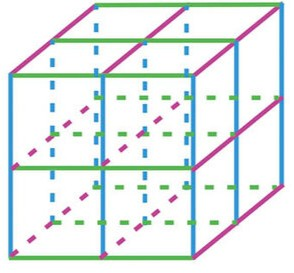

In [ ]:
n = 3
J = generate_cubic_lattice(n, seed=147712)
h = np.zeros(
    (n**3),
)

In [ ]:
result = orbit.optimize_ising(
    J,
    h,
    n_replicas=4,
    full_sweeps=125_000,
    beta_initial=0.35,
    beta_end=3.5,
    beta_step_interval=1,
)

In [ ]:
display(f"Minimum energy found: {result.min_cost}")
display(f"Minimum energy state: {result.min_state}")